# Overview

This notebook implements fourier series simualtions.

# Dependencies

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 1.3: Periodicity: Definitions, Examples, and Things to Come

A function $f(t)$ is said to be period of period $t$ if there exists a number $T > 0$ such that $\forall t$ $f(t + T) = f(t)$.

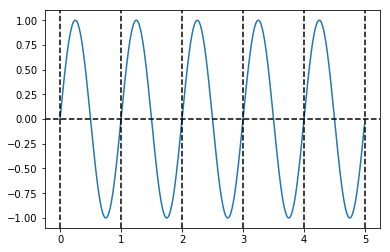

In [2]:
# Example: The basic trigonometric functions are periodic.

def period_one_sine(x):
    return np.sin(2*np.pi*x)

arange = np.arange(0, 5, 0.01)
sin_out = period_one_sine(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')
for i in range(0, 6):
    plt.axvline(x=i, linestyle='--', color='black')

Note that the sine function above has period one. For a general sinosoid of the form $f(t) = sin(\omega t + \phi)$ the period is given by $\frac{\omega}{2\pi}$. Note $\phi$ is a phase shift.

## Combining sinosoids

Note that summing sinosoids leads to a periodic function with a period that is the maximum period of all of the sinosoids being summed.

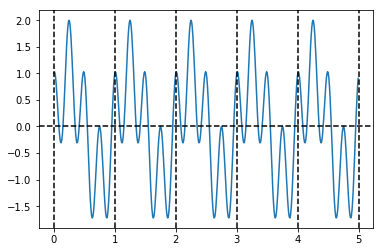

In [3]:
def sinosoid(x):
    return np.sin(2*np.pi*x) + np.cos(4*2*np.pi*x)

sin_out = sinosoid(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')
for i in range(0, 6):
    plt.axvline(x=i, linestyle='--', color='black')

Note that that combination of sinosoids can be arbitrarily complex and the above statement still holds.

## Aperiodic sinosoids

Sinusoids are only periodic if the ratio of the periods being combined is a raional number.

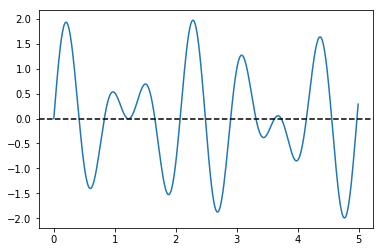

In [4]:
def sinosoid(x):
    return np.sin(2*np.pi*x) + np.sin(np.sqrt(2)*2*np.pi*x)

sin_out = sinosoid(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')

# Audio

We can "hear" the audio interpretation of sinosoids, since fundamentally sound is simply waves passing through air.

In [5]:
from IPython.display import Audio

In [6]:
sr = 22050 # sample rate

In [7]:
concert_a = lambda x: np.cos(2*np.pi*440*x)

In [8]:
sin_out = concert_a(np.arange(0, 4, 0.0001))

In [9]:
len(sin_out)

40000

In [10]:
Audio(sin_out, rate=sr)